<a href="https://colab.research.google.com/github/seokhee516/ML-DL-playground/blob/main/ai08_sc41x_%EC%A0%95%EC%84%9D%ED%9D%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC41x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron:** 입력을 받고 출력을 내보내는 구조
- **Input Layer:** 데이터셋이 입력되는 레이어
- **Hidden Layer:** 가중치와 편향이 연산되는 레이어
- **Output Layer:** 값을 출력하는 레이어
- **Activation Function:** 입력 신호를 출력 출력 신호로 바꿔주는 함수
- **Back Propagation:** 손실정보를 출력층부터 입력층까지 전달하여 가중치를 얼마나 업데이트 할 지 구하는 알고리즘

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

# 여기에 답변하시고, Cell을 Markdown으로 변경해서 입력하세요. 
예측값과 실제값의 차이를 알려주고 얼마나 줄여야하는지를 알려주는 과정


### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

# 여기에 답변하시고, Cell을 Markdown으로 변경해서 입력하세요. 
다수의 신호와 하나의 신호를 출력하기 위해 가중치와 편향을 찾는 것 

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

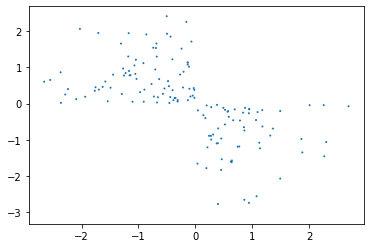

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model1 = Sequential()
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

h1 = model1.fit(X,y, epochs=30)

Epoch 1/30
10/10 [==============================] - 1s 2ms/step - loss: 0.7910 - accuracy: 0.4933
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7865 - accuracy: 0.4900
Epoch 3/30
10/10 [==============================] - 0s 1ms/step - loss: 0.7824 - accuracy: 0.4867
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7782 - accuracy: 0.4867
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.4900
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7707 - accuracy: 0.4900
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7671 - accuracy: 0.4900
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7637 - accuracy: 0.4900
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7602 - accuracy: 0.4900
Epoch 10/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.4900
Epoch 11/30
10/10 [


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [4]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [5]:
# {'acc':0.91} 멈춘다

In [6]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=2))
model2.add(Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
h2 = model2.fit(X,y, epochs=10, callbacks = [myCallback()])

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4867
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6067
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7667
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.7967
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.8200
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.8367
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8700
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8767
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.9033


### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

In [7]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


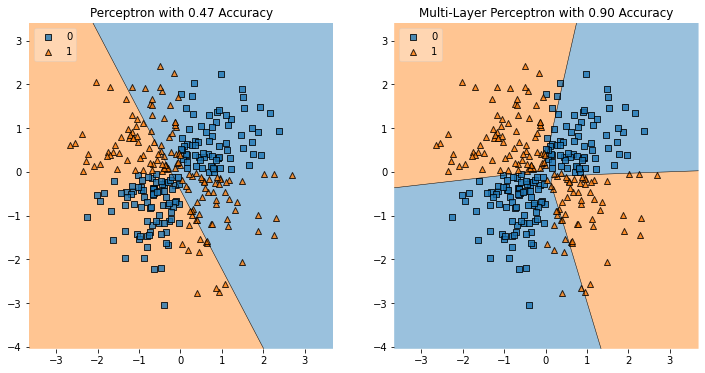

In [8]:
# 이 셀의 코드는 변경하지 마세요

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

In [9]:
# 여기에 답변하시고, Cell을 Markdown으로 변경해서 입력하세요.

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train, test = train_test_split(df, train_size = 0.75, random_state=1)
features = df.drop(columns=['target']).columns

X_train = train[features]
X_test = test[features]

y_train = train['target']
y_test = test['target']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
def model_builder(hp):
  model = Sequential()
  # Dense layer에서 노드 수를 조정(32-512)
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(Dense(units = hp_units, activation='relu'))
  model.add(Dense(units = hp_units, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

  # Optimizer의 학습률(learning rate)을 조정[0.01, 0.001, 0.0001]합니다. 
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  # 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = hp_learning_rate), 
                loss=tf.keras.losses.BinaryCrossentropy(from_logits = True), 
                metrics=['accuracy'])

  return model

In [16]:
import kerastuner as kt
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30, 
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [27]:
import IPython
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    # print(args, kwargs)
    IPython.display.clear_output(wait = True)

In [28]:
tuner.search(X_train_scaled, y_train, epochs = 30, batch_size=50, validation_data = (X_test_scaled,y_test), callbacks = [ClearTrainingOutput()])

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
최적화된 Dense 노드 수 : {best_hps.get('units')} 
최적화된 Learning Rate : {best_hps.get('learning_rate')} 
""")

Trial 61 Complete [00h 00m 01s]
val_accuracy: 0.8421052694320679

Best val_accuracy So Far: 0.8552631735801697
Total elapsed time: 00h 02m 42s
INFO:tensorflow:Oracle triggered exit

최적화된 Dense 노드 수 : 320 
최적화된 Learning Rate : 0.01 

